In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [4]:
#Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('/content/train.csv')

In [26]:
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = data['GrLivArea']
y = data['SalePrice']
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

(1460, 2)


In [69]:
#GRADIENT DESCENT

alpha = 0.001 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with
lasso_lambda = .02
ridge_lambda = .02
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    print(x.shape)
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):

        prediction = np.dot(x, theta)
        error = prediction - y
        # cost = 1/(2*m) * np.dot(error.T, error)
        # cost = 1/(2*m) * np.dot(error.T, error) + lasso_lambda*sum(abs(theta))
        cost = 1/(2*m) * np.dot(error.T, error) + ridge_lambda*sum((np.square(theta)))
        past_costs.append(cost)
        # theta = theta - (alpha * (1/m) * np.dot(x.T, error) )
        # theta = theta - (alpha * ((1/m) * np.dot(x.T, error) + lasso_lambda*np.sign(theta)))
        theta = theta - (alpha * ((1/m) * np.dot(x.T, error) + 2*ridge_lambda*theta))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))
#normal  156460.76, 48673.43   
#lasso 156460.74, 48673.41
#ridge 152253.09, 47364.11

(1460, 2)
Gradient Descent: 152253.09, 47364.11


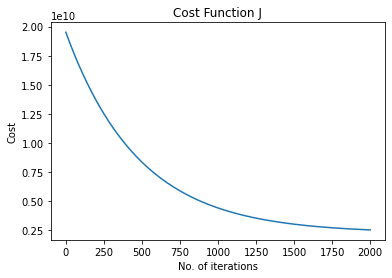

In [70]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()